# In this notebook, we implement Ridge(L2) regression from scratch

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load a dataset
data = pd.read_csv('simple-data.csv')

In [3]:
data

,x,y
0,0,50
1,1,50
2,2,54
3,3,53
4,4,54
5,5,56
6,6,56
7,7,60
8,8,65
9,9,55


We now have a perfectly simple dataset for which we try to implement L2 regularization.

before moving on to regularisation, we find least squares fit.

In [41]:
# before moving on to regularisation, we find least squares fit.

# add column of 1s to incorporate bias term
data['bias'] = 1

# extract input features and output variables
X = data[['bias','x']]
Y = data['y']

In [42]:
# convert to arrays
X_arr = np.array(X)
Y_arr = np.array(Y)

In [43]:
# implement least squares equation
W_ls = np.linalg.inv(X_arr.T @ X_arr) @ (X_arr.T @ Y_arr)

In [44]:
# we get weights for lease squares fit.
W_ls

array([50.09090909,  1.15757576])

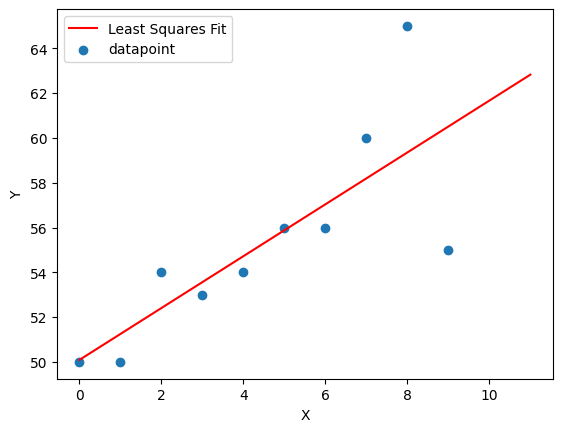

In [79]:
# visualize fit with the data

# create range pf values for fit
x_toplot = np.linspace(0,11,50)
y_lsfit = (W_ls[0] * np.ones((x_toplot.shape[0]))) + (W_ls[1] * x_toplot)

# plot scatter of points and least squares fit line
plt.plot(x_toplot,y_lsfit,color='r',label='Least Squares Fit')
plt.scatter(data['x'],data['y'],label='datapoint')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

Now we move on to regularization.<br>
From math behind L2 regulrization, we obtain the below formula for fitting a line:<br>
<b>Formula:</b><br> 
${\beta_{ridge} = (\mathbf{X}^T \mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T \mathbf{Y}}$<br>
$\lambda = $ Regularization parameter

In [80]:
# define a value for regularization parameter
reg_param = 0.09

# implement the above discussed equation
W_ridge = np.linalg.inv((X.T @ X) + (reg_param * np.identity((X.T @ X).shape[0]))) @ X.T @ Y

In [81]:
W_ridge

0    48.587137
1     1.394573
dtype: float64

In [82]:
print("Bias Term:",W_ridge[0])
print("Weight of x:",W_ridge[1])

Bias Term: 48.58713691995884
Weight of x: 1.3945730772803429


We see that bias and slope terms have changed becauze of regularization. This is done for various values of $\lambda$ and the best one with low variance and comparitively low bias is chosen.

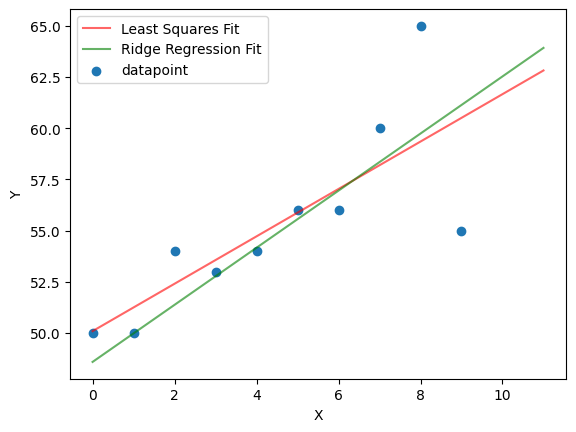

In [83]:
# compare least squares fit with ridge regression

# create range of values for fit
y_ridge = (W_ridge[0] * np.ones((x_toplot.shape[0]))) + (W_ridge[1] * x_toplot)

# plot scatter of points and least squares fit line and ridge regression line
plt.plot(x_toplot,y_lsfit,color='r',label='Least Squares Fit',alpha=0.6)
plt.plot(x_toplot,y_ridge,color='g',label='Ridge Regression Fit',alpha=0.6)
plt.scatter(data['x'],data['y'],label='datapoint')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

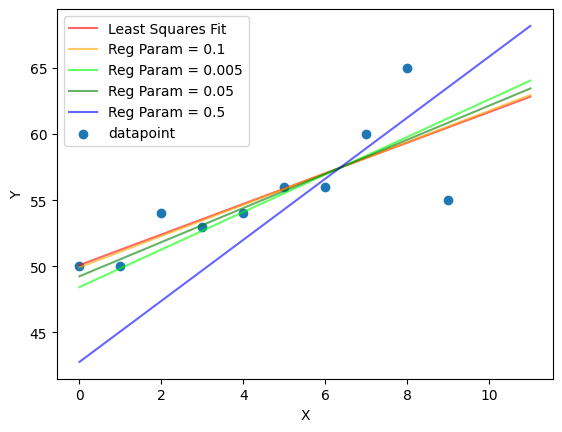

In [77]:
# compute for different values of lambda and visualize the plot
reg_param1 = 0.1
reg_param2 = 0.05
reg_param3 = 0.5

W_ridge1 = np.linalg.inv((X.T @ X) + (reg_param1 * np.identity((X.T @ X).shape[0]))) @ X.T @ Y
W_ridge2 = np.linalg.inv((X.T @ X) + (reg_param2 * np.identity((X.T @ X).shape[0]))) @ X.T @ Y
W_ridge3 = np.linalg.inv((X.T @ X) + (reg_param3 * np.identity((X.T @ X).shape[0]))) @ X.T @ Y

y_ridge1 = (W_ridge1[0] * np.ones((x_toplot.shape[0]))) + (W_ridge1[1] * x_toplot)
y_ridge2 = (W_ridge2[0] * np.ones((x_toplot.shape[0]))) + (W_ridge2[1] * x_toplot)
y_ridge3 = (W_ridge3[0] * np.ones((x_toplot.shape[0]))) + (W_ridge3[1] * x_toplot)

# plot scatter of points, least squares fit line and ridge regression lines
plt.plot(x_toplot,y_lsfit,color='r',label='Least Squares Fit',alpha=0.6)
plt.plot(x_toplot,y_ridge,color='orange',label='Reg Param = 0.1',alpha=0.6)
plt.plot(x_toplot,y_ridge1,color='lime',label='Reg Param = 0.005',alpha=0.6)
plt.plot(x_toplot,y_ridge2,color='green',label='Reg Param = 0.05',alpha=0.6)
plt.plot(x_toplot,y_ridge3,color='blue',label='Reg Param = 0.5',alpha=0.6)
plt.scatter(data['x'],data['y'],label='datapoint')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

We now visually see the effect of choosing $\lambda$. It must be chosen carefully using appropriate techniques, which will be dealt later.<br>
This is just a simple visual intuition about how L2 regularization it used to improve over the Least Squares Fit. This can be extended to any number of dimensions and works the same.